In [1]:
from perform_metrics import rank_order_truth_tables_run as rottrun
from perform_metrics import rank_order_truth_tables_stats as rottstats
from perform_metrics import rank_order_truth_tables_viz as rottviz
import os, json
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
datafile = os.path.expanduser("YSround3data/YeastSTATES-1-0-Time-Series-Round-3-0__fc_raw_log10_stats.csv")
mergefile1 = os.path.expanduser("YSround3data/pdt_YeastSTATES-1-0-Time-Series-Round-3-0__pr_growth_analysis.csv")
mergefile2 = os.path.expanduser("YSround3data/YeastSTATES-1-0-Time-Series-Round-3-0__fc_meta.csv")


# pr growth has different sample ids and cannot be joined in this way.

config = {

    "file_dict" : {"data_file" : (datafile, ["experiment_id","aliquot_id","mean_log10","std_log10"], []),
                "merge_files" : {mergefile1 : {"drop_cols" : [], "keep_cols" : ["sample_id","ungrowing"]},
                                   mergefile2 : {"drop_cols" : [], "keep_cols" : ["sample_id","control_type","media_type","timepoint","total_counts","strain_circuit","strain_input_state"]}},
                "join_on" : "sample_id"
                  },
                 
    "transformations" : {
    },
    
                 
     "filtering_criteria" : {
            "ungrowing" : (False, "eq"),
            "total_counts" : (10000, "gteq"),
            "channel" : ("BL1-A","eq")
         },
    
    "control_params" : { "pos": "HIGH_FITC","neg" : "EMPTY_VECTOR","control_col" : "control_type","circuit_col" : "strain_circuit", "geo_mean_col" : "mean_log10", "geo_mean_log10" : True },
    
    "circuit_params" : {
      "input_states" : ["00","01","10","11"],
      "input_col" : "strain_input_state",
      "group_cols" : ["strain_circuit","media_type","timepoint"]
      }
}


In [3]:
# just using cell count works fine

config = {

    "file_dict" : {"data_file" : (datafile, ["experiment_id","aliquot_id","std_log10"], []),
                "merge_files" : {mergefile2 : {"drop_cols" : [], "keep_cols" : ["sample_id","control_type","media_type","timepoint","total_counts","strain_circuit","strain_input_state"]}},
                "join_on" : "sample_id"
                  },

    "transformations" : {
    },
    
    "filtering_criteria" : {
            "total_counts" : (10000, "gteq"),
            "channel" : ("BL1-A","eq")
         },
    
    "control_params" : { "pos": "HIGH_FITC","neg" : "EMPTY_VECTOR","control_col" : "control_type","circuit_col" : "strain_circuit", "geo_mean_col" : "mean_log10", "geo_mean_log10" : True },
    
    "circuit_params" : {
      "input_states" : ["00","01","10","11"],
      "input_col" : "strain_input_state",
      "group_cols" : ["strain_circuit","media_type","timepoint"]
      }
}


In [4]:
scores, controls = rottrun.run(config,num_cores=4)
# scores = json.load(open("truth_table_scores.json"))
# controls = json.load(open("truth_table_scores_controls.json"))


/home/bree/anaconda3/envs/sd2-perform_metrics/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
print("Controls fold change: {}".format(controls["fold_change"]))
score_stats_df =  rottstats.make_df(scores,config)
score_stats_df.to_csv("score_stats_df_rd3.csv")
display(HTML(score_stats_df.to_html()))


Controls fold change: 2.846098057287336


In [6]:
for h in ["pos","neg"]:
    if h in controls:
        plt.bar(range(len(controls[h])),controls[h])
        plt.show()
        

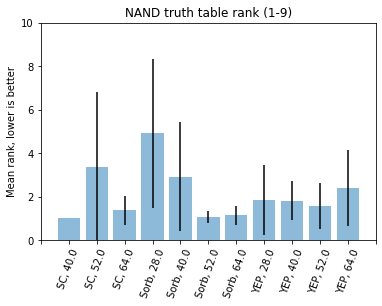

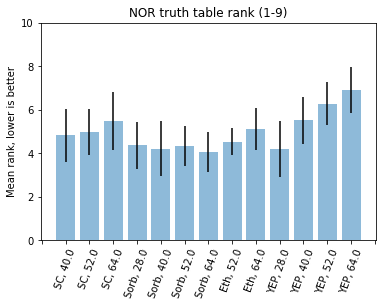

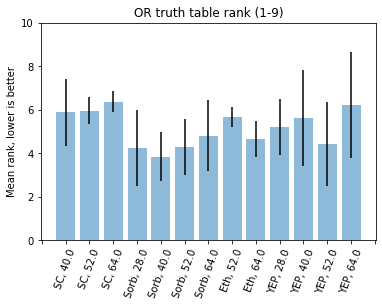

In [7]:
rottviz.plot_stats_df_old(score_stats_df, "strain_circuit", ["media_type","timepoint"], "mean_rank",top=10,customized_labels = rottviz.customize_xlabels_media, show_plot=True)

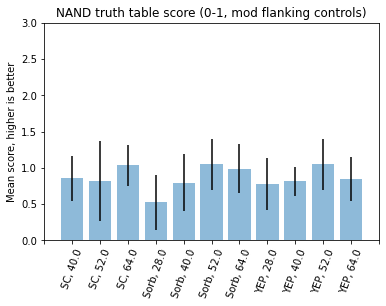

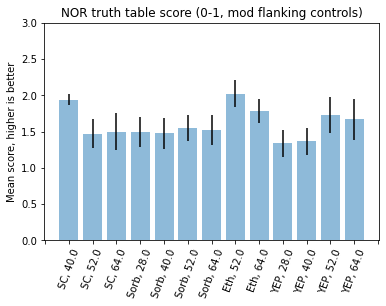

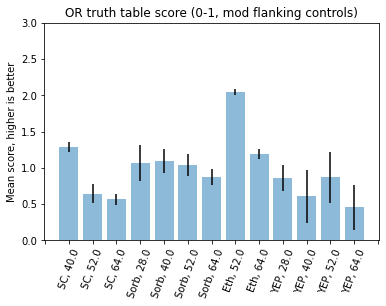

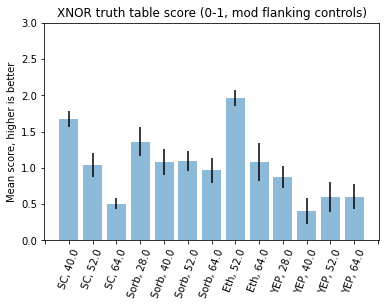

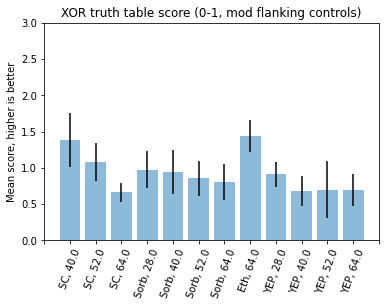

In [8]:
rottviz.plot_stats_df_old(score_stats_df, "strain_circuit", ["media_type","timepoint"], "mean_cut_score",top=3.0,customized_labels = rottviz.customize_xlabels_media, show_plot=True)